# Hotel Booking Cancellation Prediction

###### The aim of this project is to predict if a booking will be cancelled or not, based on historic bookings. We'll first explore the dataset, look for missing values, patterns and any interesting trends that can help us predict our outcome better

### Importing necessary libraries and reading in the dataset

In [ ]:
%matplotlib inline

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import missingno
from sklearn.impute import SimpleImputer

In [23]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
df_hotel = pd.read_csv("hotel_bookings.csv")

In [4]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df_hotel.shape

(119390, 32)

### We see the dataset has 119,390 rows and 32 columns
### Let's explore the numerical attributes

In [6]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### And the categorical ones

In [7]:
df_hotel.describe(include = ['O'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


### How many missing values are present in each column?

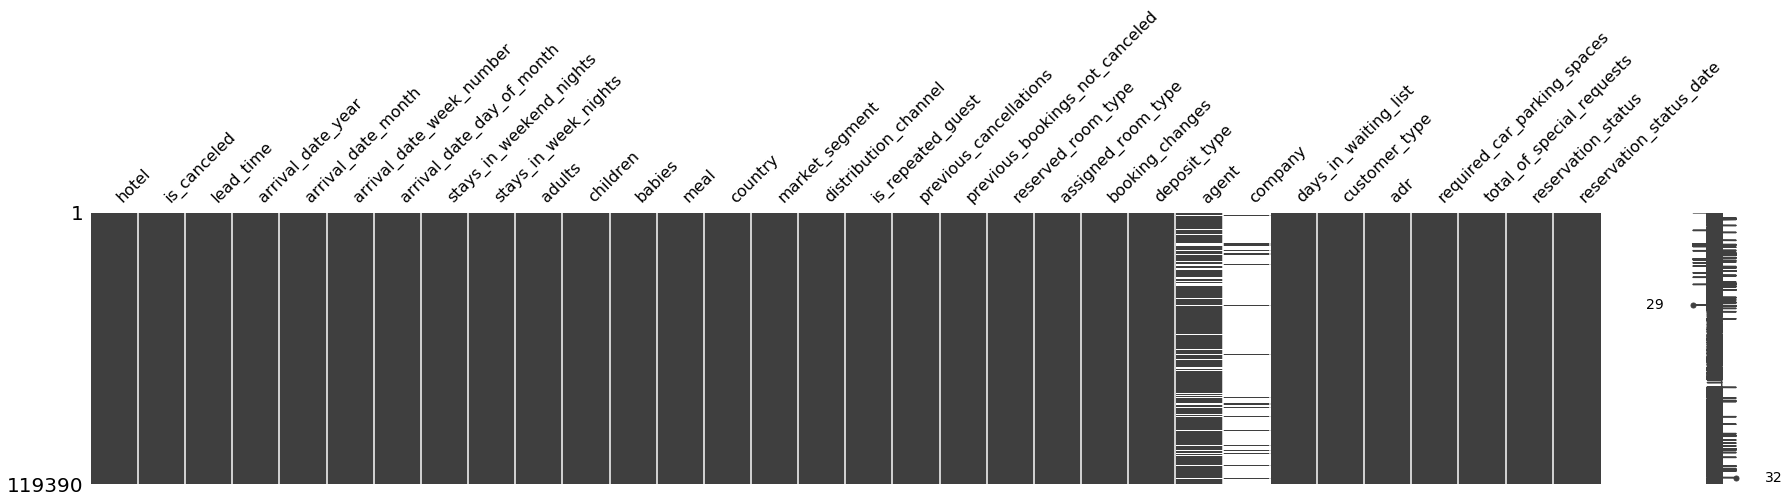

In [8]:
missingno.matrix(df_hotel, figsize = (30,5))

#### We see that company seems to have so many missing values, and agent has some as well. Let's order the columns by missing value count to get a better picture

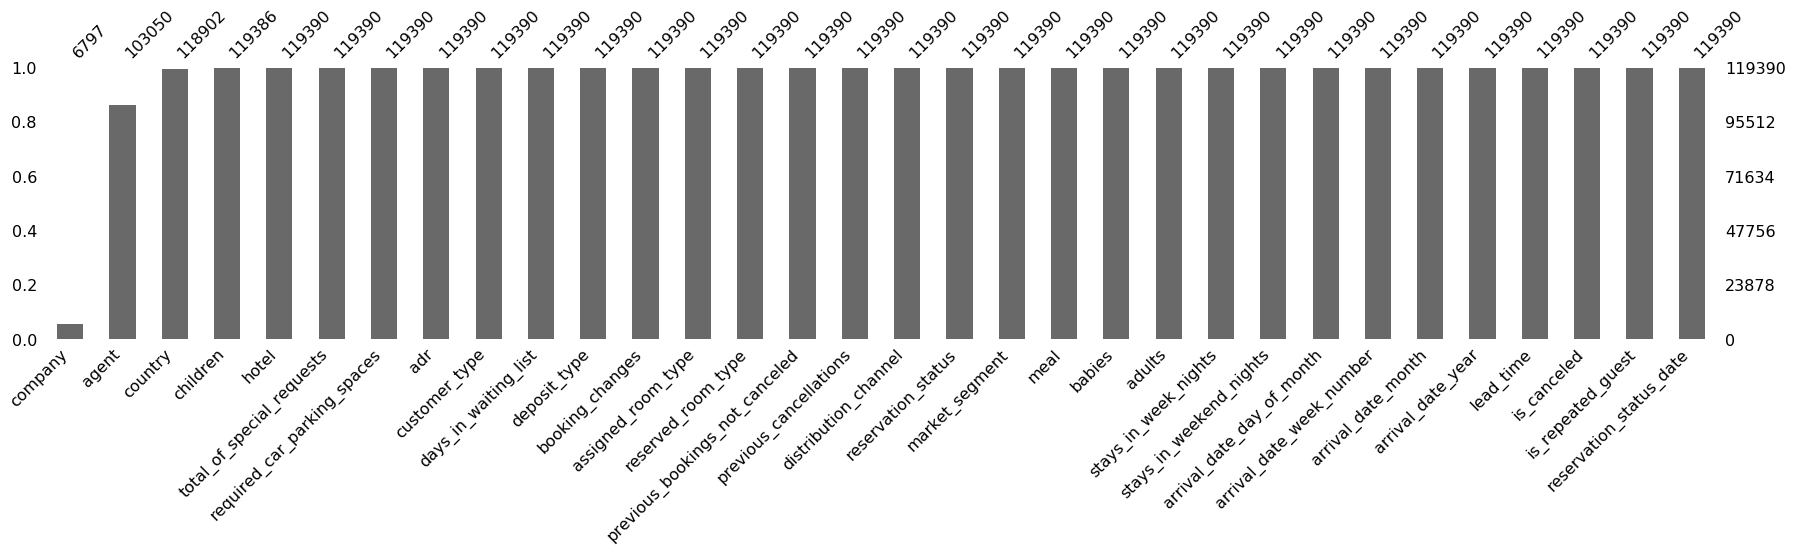

In [9]:
missingno.bar(df_hotel, sort='ascending', figsize = (30,5))

#### Company has only 6797 values out of 119390 rows. Agent, country and children have a few missing values as well. Let's look at the number of missing values per column

In [10]:
df_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### We need to deal with missing values before proceeding further into the analysis. Let's start with children first, which has only 4 missing values

In [11]:
df_hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Zero is the most common value. Let's replace the four missing values with 0.

In [12]:
df_hotel['children'].fillna(0,inplace=True)

### Next we look at countries, there are 488 missing values. Let's look at how they are distributed

In [13]:
df_hotel['country'].value_counts().sort_values(ascending = False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
GUY        1
MDG        1
SLE        1
VGB        1
CYM        1
Name: country, Length: 177, dtype: int64

In [14]:
df_hotel['country'].value_counts(normalize=True).sort_values(ascending = False)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
GUY     0.000841
MDG     0.000841
SLE     0.000841
VGB     0.000841
CYM     0.000841
Name: country, Length: 177, dtype: float64

#### Portugal has close to 41% of the values. This makes sense since the hotels are located in Portugal, 41% of tourists are domestic

We'll replace the missing values with the most frequently occuring value, which is PRT

In [16]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
temp_country = imp_mode.fit_transform(df_hotel['country'].values.reshape(-1,1))

In [17]:
df_hotel['country'] = temp_country

### Done. Let's look at what other values are missing

In [18]:
x = df_hotel.isna().sum()
x[x>0]

agent       16340
company    112593
dtype: int64

#### Close to 90% of the values are missing in the company column. It wouldn't make sense to keep this, as it's won't give us useful information. Let's drop this column

In [19]:
df_hotel.drop('company', axis=1, inplace = True)

#### Agent is the remaining field with missing values

In [20]:
df_hotel['agent'] = df_hotel['agent'].astype(str)
df_hotel['agent'].value_counts()

9.0      31961
nan      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
301.0        1
450.0        1
294.0        1
453.0        1
247.0        1
Name: agent, Length: 334, dtype: int64

#### Let's impute the nan values as No Agent

In [21]:
df_hotel.loc[df_hotel['agent'] == 'nan', 'agent'] = 'No Agent'
df_hotel['agent'].value_counts()

9.0         31961
No Agent    16340
240.0       13922
1.0          7191
14.0         3640
            ...  
265.0           1
300.0           1
144.0           1
54.0            1
451.0           1
Name: agent, Length: 334, dtype: int64

## Great, now that missing values are dealt with, we can start exploring the data further

#### Lead time distribution

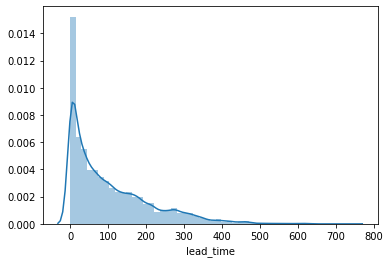

In [22]:
sns.distplot(df_hotel['lead_time'])

We see that a large fraction of the values are in the 0-10 range, with a long right tail. We can explore this further with an interactive histogram

In [25]:
df_hotel['lead_time'].iplot(kind='hist', title="Lead time distibution")

This gives us a better idea of how the distribution is

### The is_cancelled is our binary target variable. We can convert it to a string from numeric to better explore the data

In [8]:
df_hotel["is_canceled"] = df_hotel["is_canceled"].astype(str)

### Distribution of countries in the data

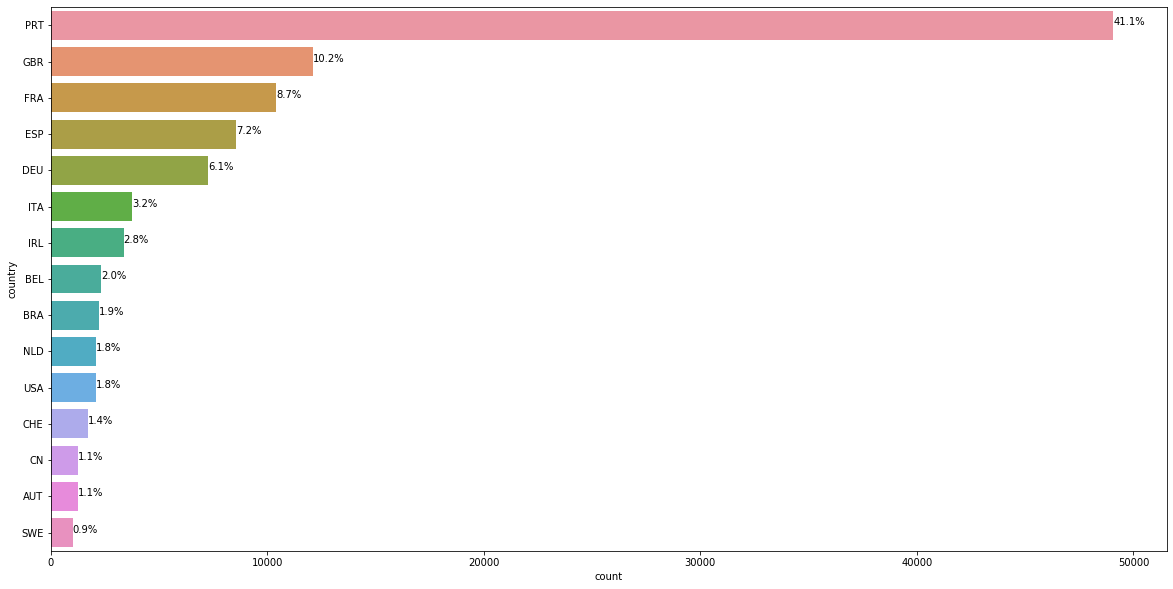

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(y="country", data=df_hotel, order=df_hotel.country.value_counts().iloc[:15].index)

total = len(df_hotel['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

### We know that there are two types of hotels - Resort and City. How are the cancellations across these two?

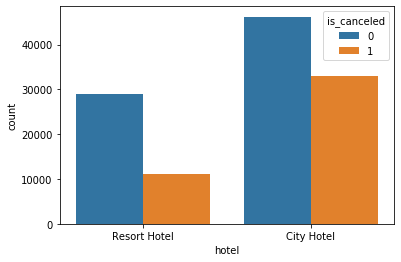

In [27]:
sns.countplot(x="hotel", hue = "is_canceled", data = df_hotel)

It looks like city hotel has a higher fraction of cancellations compared to Resorts. We can compare this better with a stacked chart

In [28]:
df_hoteltype = df_hotel[['hotel', 'is_canceled']]
df_hoteltype['count'] = 1
df_hoteltype.head()

,hotel,is_canceled,count
0,Resort Hotel,0,1
1,Resort Hotel,0,1
2,Resort Hotel,0,1
3,Resort Hotel,0,1
4,Resort Hotel,0,1


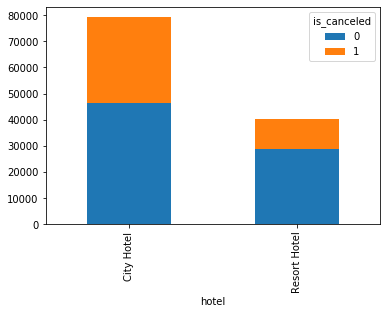

In [29]:
df_hoteltype.groupby(['hotel', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True)

City hotel has the more number of bookings, as well aas the higher fraction of cancellations compared to Resort hotel

### Question: What are the countries with highest cancellation percentages?

#### Let's look at which countries have highest cancellation rates, for each type of hotel. I want to select only countries which have atleast 500 bookings for this analysis

In [30]:
df_country_count = df_hotel['country'].value_counts().sort_values(ascending = False)

In [31]:
df_country_count1 = df_country_count[df_country_count > 500]
df_country_count1

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: country, dtype: int64

In [32]:
x = list(df_country_count1.index)
x

['PRT',
 'GBR',
 'FRA',
 'ESP',
 'DEU',
 'ITA',
 'IRL',
 'BEL',
 'BRA',
 'NLD',
 'USA',
 'CHE',
 'CN',
 'AUT',
 'SWE',
 'CHN',
 'POL',
 'ISR',
 'RUS',
 'NOR']

We have chosen the countries we want to look at. Let's filter the dataframe based on these countries

In [33]:
df1 = df_hotel.loc[df_hotel['country'].isin(x)]
df1.shape

(112507, 31)

In [34]:
df2 = df1[['is_canceled','hotel','country']]
df2.head()

,is_canceled,hotel,country
0,0,Resort Hotel,PRT
1,0,Resort Hotel,PRT
2,0,Resort Hotel,GBR
3,0,Resort Hotel,GBR
4,0,Resort Hotel,GBR


#### Let's analyse resort hotels first

In [36]:
#Disabling warning
pd.options.mode.chained_assignment = None

In [37]:
#Resort
df2_resort = df2.loc[df2['hotel'] == 'Resort Hotel']
df2_resort.drop('hotel', axis=1, inplace=True)
df2_resort.head()

,is_canceled,country
0,0,PRT
1,0,PRT
2,0,GBR
3,0,GBR
4,0,GBR


In [38]:
df2_resort['count'] = 1

In [39]:
df2_resort1 = df2_resort.groupby(["country","is_canceled"], as_index=False)["count"].count()

In [41]:
df_resort2 = pd.pivot_table(df2_resort1, values='count', index=['country'],
                    columns=['is_canceled'], aggfunc=np.sum, fill_value=0)

In [42]:
df_resort2.head()

is_canceled,0,1
country,,
AUT,176,34
BEL,389,59
BRA,329,101
CHE,323,112
CHN,125,9


In [44]:
df_resort2.columns

Int64Index([0, 1], dtype='int64', name='is_canceled')

In [46]:
df_resort2['perc_canceled'] = df_resort2[1]/(df_resort2[0] + df_resort2[1])
df_resort2

is_canceled,0,1,perc_canceled
country,,,
AUT,176,34,0.161905
BEL,389,59,0.131696
BRA,329,101,0.234884
CHE,323,112,0.257471
CHN,125,9,0.067164


In [47]:
#Dropping isreal because the number is small
df_resort2.drop(['ISR'], inplace=True)
df_resort2

is_canceled,0,1,perc_canceled
country,,,
AUT,176,34,0.161905
BEL,389,59,0.131696
BRA,329,101,0.234884
CHE,323,112,0.257471
CHN,125,9,0.067164
CN,614,96,0.135211
DEU,1057,146,0.121363
ESP,3106,851,0.215062
FRA,1400,211,0.130975


In [48]:
df_resort2 = df_resort2.sort_values('perc_canceled', ascending = False)

#### Top ten countries - highest cancellations for Resorts

In [49]:
df_resort2_top10 = df_resort2.head(10)
#df_resort2_top10

In [50]:
df_resort2_top10['perc_canceled'] = round((df_resort2_top10['perc_canceled']*100),2)
df_resort2_top10

is_canceled,0,1,perc_canceled
country,,,
PRT,10611,7483,41.36
RUS,128,61,32.28
CHE,323,112,25.75
SWE,231,73,24.01
BRA,329,101,23.49
ESP,3106,851,21.51
IRL,1734,432,19.94
NOR,100,23,18.70
ITA,379,80,17.43


In [51]:
df_resort2_top10.columns

Index([0, 1, 'perc_canceled'], dtype='object', name='is_canceled')

In [52]:
df_resort2_top10 = df_resort2_top10.reset_index()
df_resort2_top10

is_canceled,country,0,1,perc_canceled
0,PRT,10611,7483,41.36
1,RUS,128,61,32.28
2,CHE,323,112,25.75
3,SWE,231,73,24.01
4,BRA,329,101,23.49
5,ESP,3106,851,21.51
6,IRL,1734,432,19.94
7,NOR,100,23,18.70
8,ITA,379,80,17.43
9,AUT,176,34,16.19


#### Plotting countries with highest cancellation % for resort hotels

Text(0.5, 1.0, 'Countries with highest cancellation % - Resort Hotel')

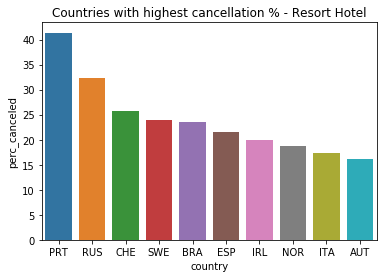

In [53]:
sns.barplot(x="country", y="perc_canceled", data=df_resort2_top10).set_title('Countries with highest cancellation % - Resort Hotel')

#### Now for city hotels

In [54]:
#City
df2_city = df2.loc[df2['hotel'] == 'City Hotel']
df2_city.drop('hotel', axis=1, inplace=True)
df2_city.head()

,is_canceled,country
40060,0,PRT
40061,1,PRT
40062,1,PRT
40063,1,PRT
40064,1,PRT


In [55]:
df2_city['count'] = 1
df2_city1 = df2_city.groupby(["country","is_canceled"], as_index=False)["count"].count()
df2_city1.head()

,country,is_canceled,count
0,AUT,0,857
1,AUT,1,196
2,BEL,0,1479
3,BEL,1,415
4,BRA,0,1065


In [56]:
df_city2 = pd.pivot_table(df2_city1, values='count', index=['country'],
                    columns=['is_canceled'], aggfunc=np.sum, fill_value=0)

df_city2['perc_canceled'] = df_city2[1]/(df_city2[0] + df_city2[1])
df_city2.head()

is_canceled,0,1,perc_canceled
country,,,
AUT,857,196,0.186135
BEL,1479,415,0.219113
BRA,1065,729,0.406355
CHE,979,316,0.244015
CHN,412,453,0.523699


In [57]:
df_city2 = df_city2.sort_values('perc_canceled', ascending = False)

In [58]:
df_city2

is_canceled,0,1,perc_canceled
country,,,
PRT,10881,20103,0.648819
CHN,412,453,0.523699
BRA,1065,729,0.406355
RUS,265,178,0.401806
ITA,2054,1253,0.378893
IRL,809,400,0.330852
NOR,326,158,0.326446
POL,410,176,0.300341
GBR,3753,1562,0.293885


### Let's look at the top 10 countries with highest cancellation % for city hotels

In [59]:
df_city2_top10 = df_city2.head(10)
df_city2_top10

is_canceled,0,1,perc_canceled
country,,,
PRT,10881,20103,0.648819
CHN,412,453,0.523699
BRA,1065,729,0.406355
RUS,265,178,0.401806
ITA,2054,1253,0.378893
IRL,809,400,0.330852
NOR,326,158,0.326446
POL,410,176,0.300341
GBR,3753,1562,0.293885


In [60]:
df_city2_top10['perc_canceled'] = round((df_city2_top10['perc_canceled']*100),2)
df_city2_top10

is_canceled,0,1,perc_canceled
country,,,
PRT,10881,20103,64.88
CHN,412,453,52.37
BRA,1065,729,40.64
RUS,265,178,40.18
ITA,2054,1253,37.89
IRL,809,400,33.09
NOR,326,158,32.64
POL,410,176,30.03
GBR,3753,1562,29.39


In [61]:
df_city2_top10 = df_city2_top10.reset_index()
#df_resort2_top10.drop('index',axis=1,inplace=True)
df_city2_top10

is_canceled,country,0,1,perc_canceled
0,PRT,10881,20103,64.88
1,CHN,412,453,52.37
2,BRA,1065,729,40.64
3,RUS,265,178,40.18
4,ITA,2054,1253,37.89
5,IRL,809,400,33.09
6,NOR,326,158,32.64
7,POL,410,176,30.03
8,GBR,3753,1562,29.39
9,ESP,3285,1326,28.76


### Plotting the value for city hotels

Text(0.5, 1.0, 'Countries with highest cancellation % - City Hotel')

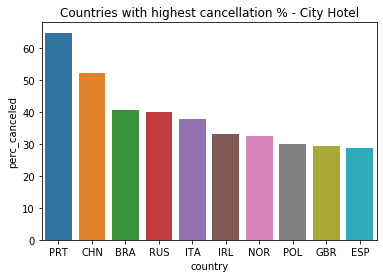

In [62]:
sns.barplot(x="country", y="perc_canceled", data=df_city2_top10).set_title('Countries with highest cancellation % - City Hotel')

We see over 60% of domestic bookings in City Hotels end up in cancellation

## Distribution channels

Let's look at the different types of channels

In [63]:
df_hotel['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Undefined has 5 values. We can substitute this with the highest frequency value 'TA/TO'

In [64]:
df_hotel.loc[df_hotel['distribution_channel'] == 'Undefined', 'distribution_channel'] = 'TA/TO'
df_hotel['distribution_channel'].value_counts()

TA/TO        97875
Direct       14645
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

In [65]:
df_dist_channel = df_hotel[['distribution_channel', 'is_canceled']]
df_dist_channel['count'] = 1
df_dist_channel.head()

,distribution_channel,is_canceled,count
0,Direct,0,1
1,Direct,0,1
2,Direct,0,1
3,Corporate,0,1
4,TA/TO,0,1


#### Plotting distribution channel types and cancellations

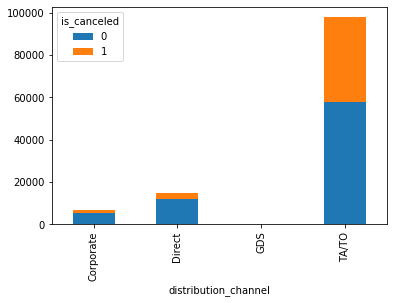

In [66]:
df_dist_channel.groupby(['distribution_channel', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True)

#### TA/TO is the most dominant category by far. Let's explore the cancellation percentage across different categories

In [67]:
df_dist_channel1 = df_dist_channel.groupby(["distribution_channel", "is_canceled"], as_index=False)["count"].sum()
print(df_dist_channel1.shape)
print()
print(df_dist_channel1)

(8, 3)

  distribution_channel  is_canceled  count
0            Corporate            0   5203
1            Corporate            1   1474
2               Direct            0  12088
3               Direct            1   2557
4                  GDS            0    156
5                  GDS            1     37
6                TA/TO            0  57719
7                TA/TO            1  40156


In [68]:
df_dist_channel2 = pd.pivot_table(df_dist_channel1, values='count', index=['distribution_channel'],
                    columns=['is_canceled'], aggfunc=np.sum, fill_value=0)
df_dist_channel2

is_canceled,0,1
distribution_channel,,
Corporate,5203,1474
Direct,12088,2557
GDS,156,37
TA/TO,57719,40156


In [71]:
df_dist_channel2['perc_canceled'] = df_dist_channel2[1]/(df_dist_channel2[0] + df_dist_channel2[1])
df_dist_channel2

is_canceled,0,1,perc_canceled
distribution_channel,,,
Corporate,5203,1474,0.220758
Direct,12088,2557,0.174599
GDS,156,37,0.191710
TA/TO,57719,40156,0.410278


In [73]:
df_dist_channel2 = df_dist_channel2.reset_index()
#df_resort2_top10.drop('index',axis=1,inplace=True)
df_dist_channel2

is_canceled,distribution_channel,0,1,perc_canceled
0,Corporate,5203,1474,0.220758
1,Direct,12088,2557,0.174599
2,GDS,156,37,0.191710
3,TA/TO,57719,40156,0.410278


#### Plot of cancellation % across different distribution channels

Text(0.5, 1.0, 'Dist. Channels - % cancellations')

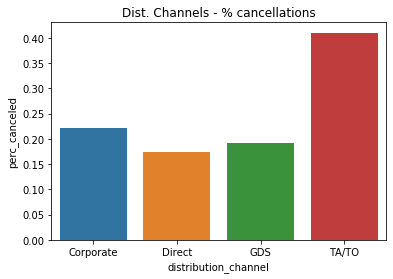

In [75]:
sns.barplot(x="distribution_channel", y="perc_canceled", data=df_dist_channel2).set_title('Dist. Channels - % cancellations')

### ADR (Average Daily Rate) distribution across different channels

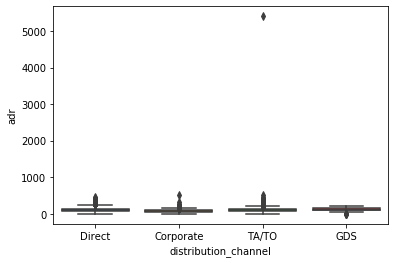

In [76]:
sns.boxplot(x="distribution_channel", y="adr", data=df_hotel)

We see there is one outlier which has ADR > 5000 in the TA/TO category. Let's remove this

In [77]:
#Remove one huge outlier
df_hotel.loc[df_hotel['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [78]:
df_hotel = df_hotel.drop(48515)

Text(0.5, 1.0, 'ADR across different distribution channels')

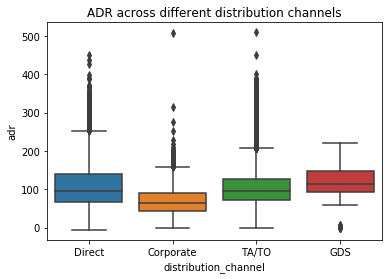

In [79]:
sns.boxplot(x="distribution_channel", y="adr", data=df_hotel).set_title("ADR across different distribution channels")

#### Does the ADR have different disrtibutions depending on whether the booking is cancelled or not?

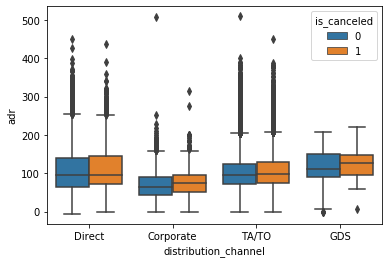

In [80]:
sns.boxplot(x="distribution_channel", y="adr",hue = "is_canceled", data=df_hotel)

### Plotting the KDE for each type of channel

In [81]:
channels = list(df_hotel['distribution_channel'].unique())
channels

['Direct', 'Corporate', 'TA/TO', 'GDS']

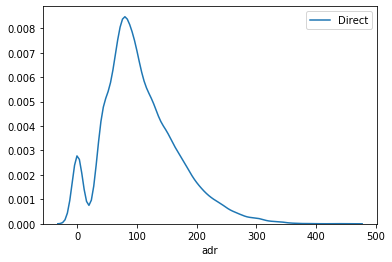

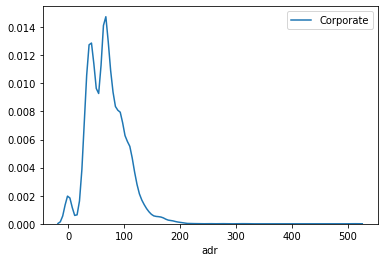

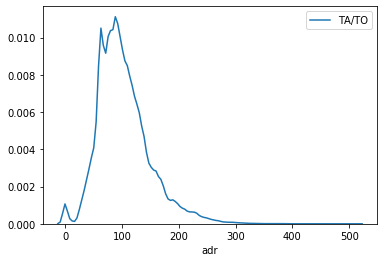

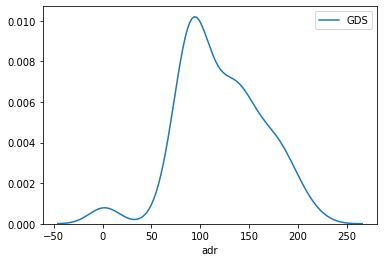

In [82]:
# Iterate through each channel

for channel in channels:
    # Subset to the airline
    subset = df_hotel[df_hotel['distribution_channel'] == channel]
    
    # Draw the density plot
    sns.distplot(subset['adr'], hist = False, kde = True,
                 label = channel)
    plt.show()
    
# Plot formatting
#plt.legend(title = 'Channel')
#plt.title('Density Plot with Multiple Channels')
#plt.xlabel('ADR')
#plt.ylabel('Density')

### Room Type

In [83]:
df_hotel['reserved_room_type'].value_counts()

A    85993
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

#### Room types P and L have very few bookings. We can replace these as 'A', which has the majority of bookings

In [84]:
df_hotel.loc[df_hotel['reserved_room_type'] == 'L', 'reserved_room_type'] = 'A'
df_hotel.loc[df_hotel['reserved_room_type'] == 'P', 'reserved_room_type'] = 'A'

In [85]:
df_hotel['reserved_room_type'].value_counts()

A    86011
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
Name: reserved_room_type, dtype: int64

#### Let's see if cancellation percentage is different across different room types

In [86]:
df_roomtype = df_hotel[['reserved_room_type', 'is_canceled']]
df_roomtype['count'] = 1
df_roomtype.head()

,reserved_room_type,is_canceled,count
0,C,0,1
1,C,0,1
2,A,0,1
3,A,0,1
4,A,0,1


In [87]:
df_roomtype1 = df_roomtype.groupby(["reserved_room_type", "is_canceled"], as_index=False)["count"].sum()
print(df_roomtype1.shape)
print()
print(df_roomtype1)

(16, 3)

   reserved_room_type  is_canceled  count
0                   A            0  52368
1                   A            1  33643
2                   B            0    750
3                   B            1    368
4                   C            0    624
5                   C            1    308
6                   D            0  13099
7                   D            1   6102
8                   E            0   4621
9                   E            1   1914
10                  F            0   2017
11                  F            1    880
12                  G            0   1331
13                  G            1    763
14                  H            0    356
15                  H            1    245


In [89]:
df_roomtype2 = pd.pivot_table(df_roomtype1, values='count', index=['reserved_room_type'],
                    columns=['is_canceled'], aggfunc=np.sum, fill_value=0)
df_roomtype2['perc_canceled'] = df_roomtype2[1]/(df_roomtype2[0] + df_roomtype2[1])
df_roomtype2

is_canceled,0,1,perc_canceled
reserved_room_type,,,
A,52368,33643,0.391148
B,750,368,0.329159
C,624,308,0.330472
D,13099,6102,0.317796
E,4621,1914,0.292884
F,2017,880,0.303763
G,1331,763,0.364374
H,356,245,0.407654


In [90]:
df_roomtype2 = df_roomtype2.reset_index()
#df_resort2_top10.drop('index',axis=1,inplace=True)
df_roomtype2

is_canceled,reserved_room_type,0,1,perc_canceled
0,A,52368,33643,0.391148
1,B,750,368,0.329159
2,C,624,308,0.330472
3,D,13099,6102,0.317796
4,E,4621,1914,0.292884
5,F,2017,880,0.303763
6,G,1331,763,0.364374
7,H,356,245,0.407654


#### Plot of percentage cancellations against room type

Text(0.5, 1.0, 'Cancellation % by room type')

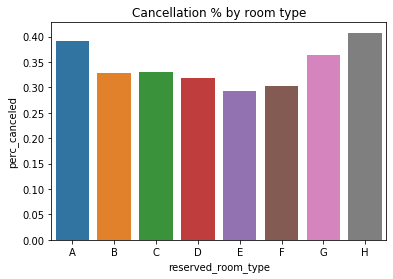

In [92]:
sns.barplot(x="reserved_room_type", y="perc_canceled", data=df_roomtype2).set_title('Cancellation % by room type')

Room types H and A have the highest cancellation rates

### Agent variable

Count of each value

In [93]:
df_hotel['agent'].value_counts()

9.0         31961
No Agent    16340
240.0       13922
1.0          7191
14.0         3640
            ...  
265.0           1
300.0           1
144.0           1
54.0            1
451.0           1
Name: agent, Length: 334, dtype: int64

#### We see there are a lot of agents which have very few bookings. This might overfit while building the model, so I'm combining all agents that have less than 100 bookings into a category 'Other'

In [94]:
x = df_hotel['agent'].value_counts()

In [95]:
other_agent = x[x<=100].index
other_agent

Index(['36.0', '89.0', '464.0', '155.0', '170.0', '69.0', '159.0', '253.0',
       '13.0', '281.0',
       ...
       '433.0', '247.0', '117.0', '158.0', '197.0', '265.0', '300.0', '144.0',
       '54.0', '451.0'],
      dtype='object', length=250)

In [96]:
df_hotel.loc[df_hotel['agent'].isin(other_agent), 'agent'] = 'Others'

In [97]:
df_hotel['agent'].value_counts()

9.0         31961
No Agent    16340
240.0       13922
1.0          7191
Others       5330
            ...  
146.0         124
98.0          124
94.0          114
35.0          109
220.0         104
Name: agent, Length: 85, dtype: int64

### How are bookings distributed across different months?

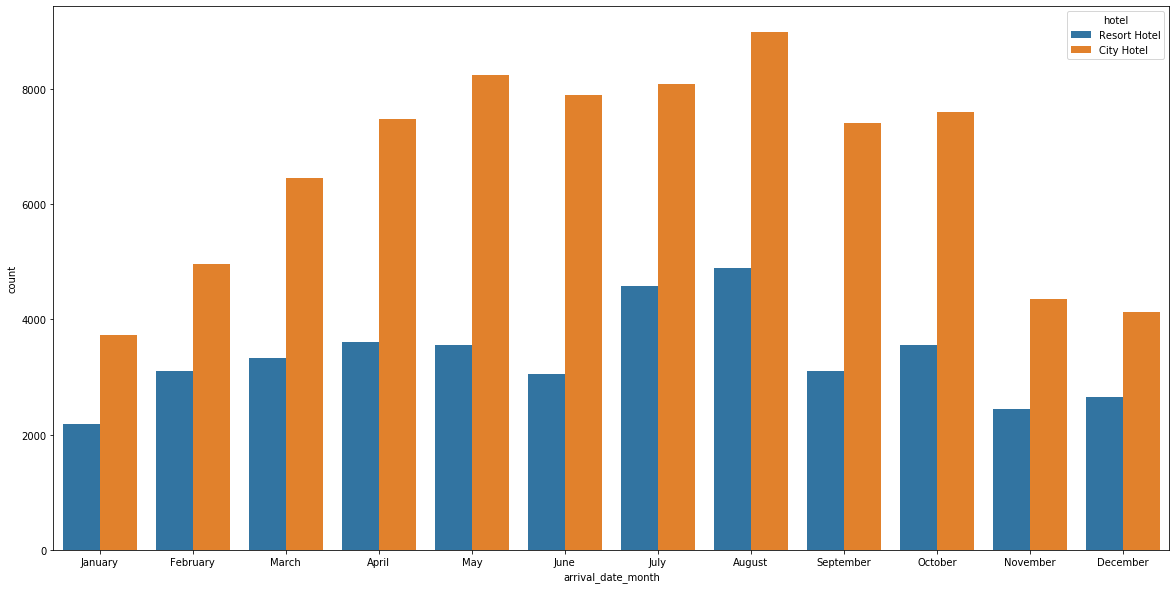

In [99]:
plt.figure(figsize=(20,10))
sns.countplot(x="arrival_date_month", data=df_hotel, hue="hotel", order = ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.show()

August has the highest number of bookings, while Jan and December have the least. Both hotels follow a similar pattern across months

### What about day of the month?

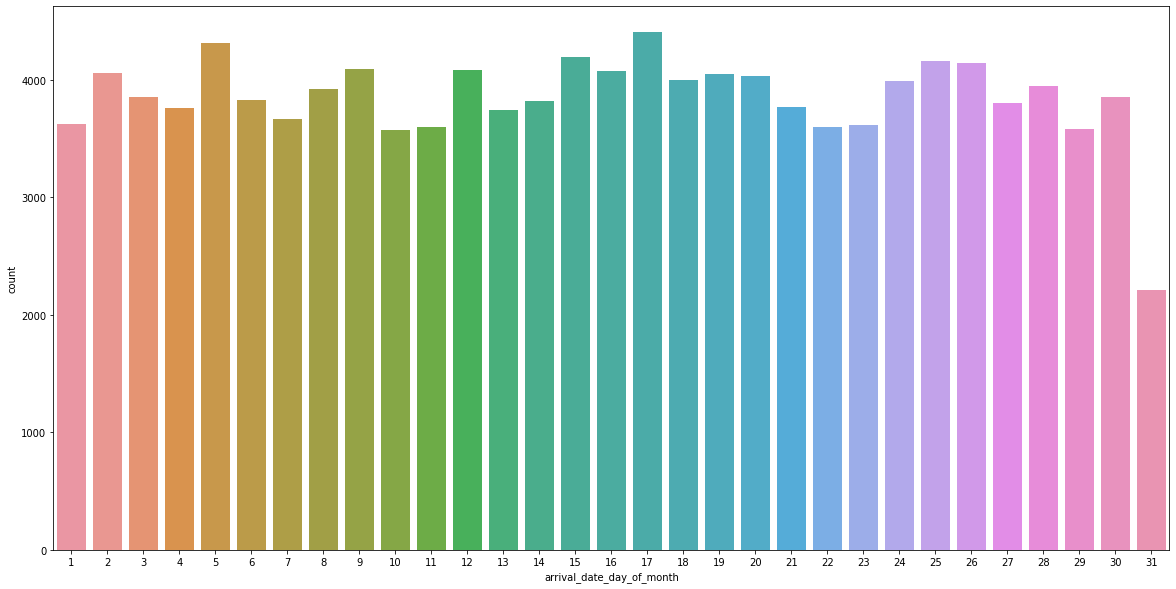

In [100]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_hotel['arrival_date_day_of_month'])
plt.show()

## Variable: Children

Let's see the distribution of number of children

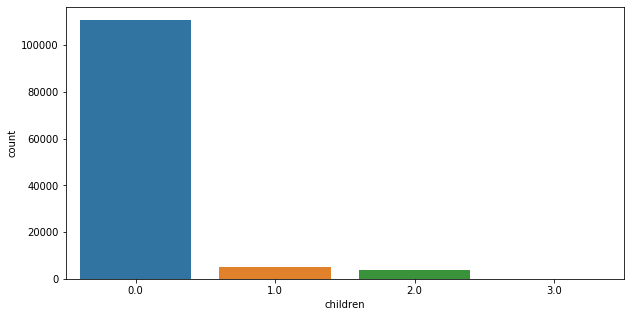

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['children'])
plt.show()

There are values with children = 10. Let's look into this

In [102]:
df_hotel[df_hotel['children'] > 9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,2,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12


#### Since it is just one value, we can remove this outlier

In [103]:
df_hotel = df_hotel.drop(df_hotel[df_hotel.children > 9].index)

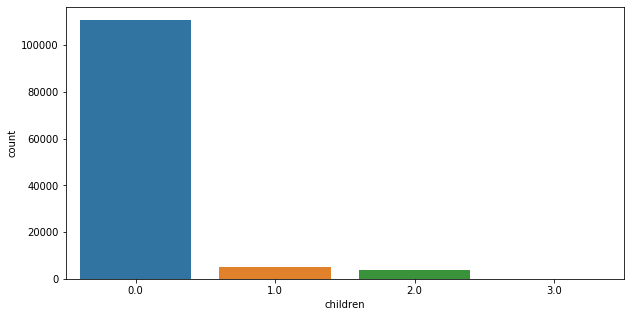

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['children'])
plt.show()

## Variable: Babies

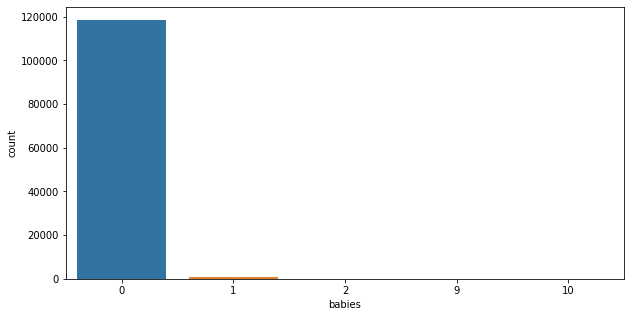

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['babies'])
plt.show()

Again, there are values with 9 and 10 babies

In [107]:
df_hotel[df_hotel['babies'] > 2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,1,No Deposit,9.0,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,1,No Deposit,95.0,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


We can remove these two outliers

In [108]:
df_hotel = df_hotel.drop(df_hotel[df_hotel.babies > 2].index)

## Variable: Adults

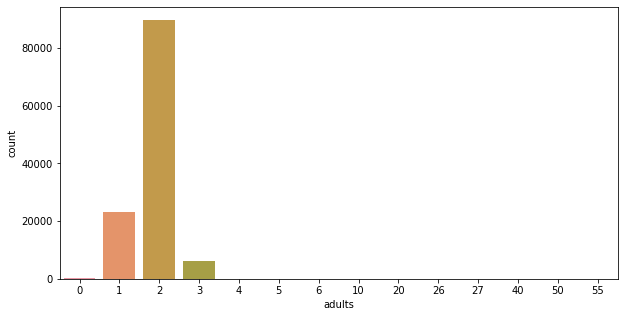

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['adults'])
plt.show()

Let's look into what these high values are

In [110]:
df_hotel[df_hotel['adults'] > 5].transpose()

,1539,1587,1643,1752,1884,1917,1962,2003,2164,2173,2228,2229,2417,2418
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,1,1,1,1,1,1,1,1,1,1,1,1,1,1
lead_time,304,333,336,340,347,349,352,354,361,338,328,328,334,334
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,September,September,September,September,September,September,September,September,October,October,October,October,October,October
arrival_date_week_number,36,36,37,37,38,39,39,39,40,41,41,41,42,42
arrival_date_day_of_month,3,5,7,12,19,21,24,26,3,4,6,6,12,12
stays_in_weekend_nights,0,2,1,2,2,1,1,2,2,2,2,2,2,2
stays_in_week_nights,3,5,2,5,5,3,3,5,5,0,5,5,5,5
adults,40,26,50,26,26,27,27,26,26,55,20,6,10,20


#### Looks like they are all made in Sep-Oct 2015. These high values can skew the final predictions, so we can remove these

In [111]:
df_hotel = df_hotel.drop(df_hotel[df_hotel.adults > 5].index)

### Variable: Meal type

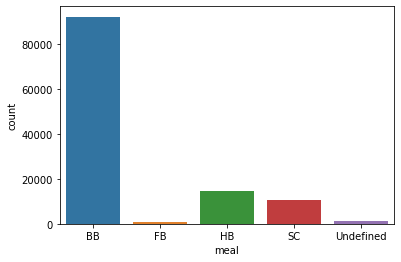

In [112]:
sns.countplot(x=df_hotel['meal'])

Bed and breakfast is the most preffered meal option followed by half board

## Variable: Market segment

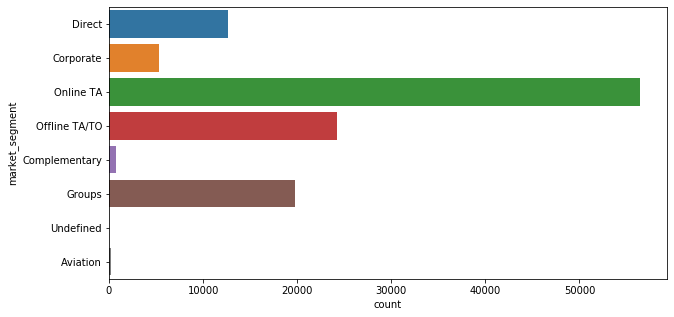

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(y=df_hotel['market_segment'])
plt.show()

Online and offline Travel Agents are the most common market segments

## Variable: Repeated guest

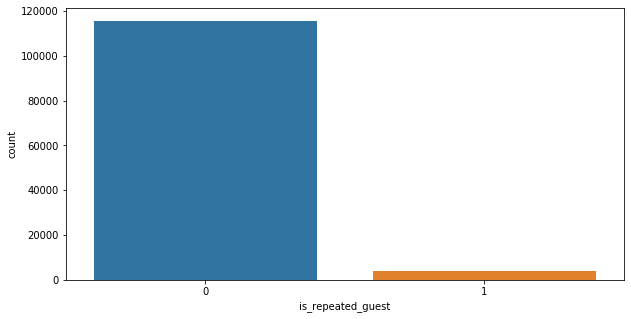

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['is_repeated_guest'])
plt.show()

A very small fraction of bookings come from repeated guests

## Variable: Previous cancellations

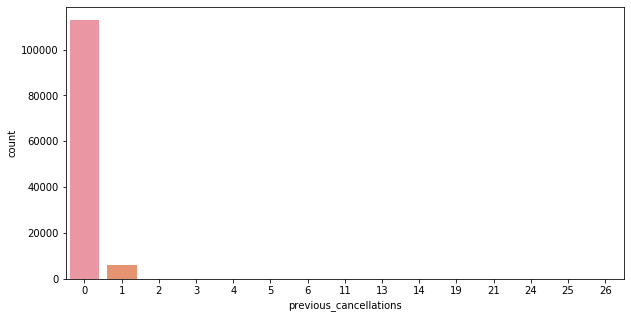

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_hotel['previous_cancellations'])
plt.show()

In [117]:
df_hotel['previous_cancellations'].value_counts()#.sort_values(ascending = False)

0     112888
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

Let's explore these high values

In [118]:
df_hotel[df_hotel['previous_cancellations'] == 24]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14972,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14973,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14974,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14975,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14976,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14977,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14978,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14979,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14980,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28
14981,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,Non Refund,No Agent,0,Transient,121.5,0,0,Canceled,2015-04-28


#### These look like duplicate entries for two sets of bookings. We can further look into other values too:

In [119]:
df_hotel[df_hotel['previous_cancellations'] == 25]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14829,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14830,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14831,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14832,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14833,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14834,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14835,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14836,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14837,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,49.95,0,0,Canceled,2015-03-03
14838,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,Non Refund,Others,0,Transient,38.00,0,0,Canceled,2015-03-03


#### Exploring other values, we see they all seem like duplicate or incorrect entries. Hence, we can remove those with previous cancellations > 13

In [120]:
df_hotel = df_hotel.drop(df_hotel[df_hotel.previous_cancellations > 13].index)

## Variables: Reserved and assigned room type

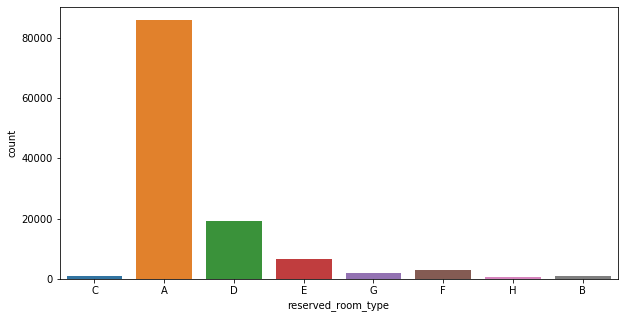

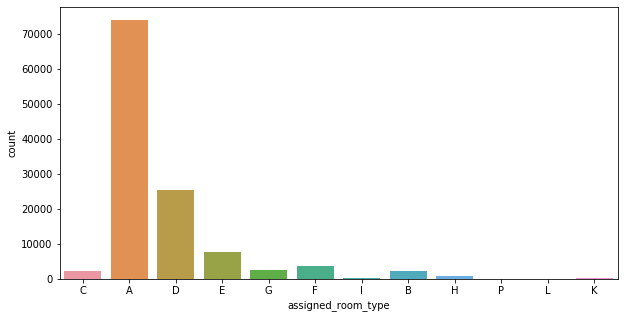

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(df_hotel['reserved_room_type'])
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(df_hotel['assigned_room_type'])
plt.show()

#### They follow a similar pattern, as reserved rooms are assigned to guests most of the times. Since assigned room will be known only at the time a guest arrives, this would lead to data leakage and hence we won't include assigned room type in our models

## Variable: Deposit Type

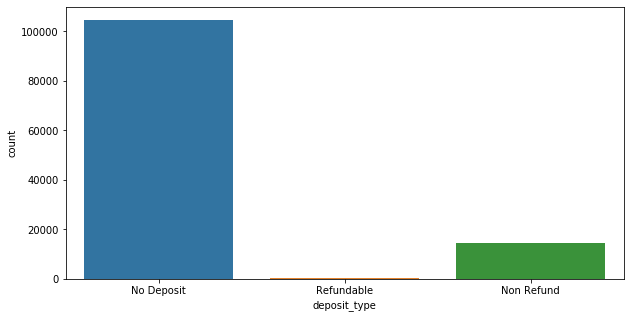

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(df_hotel['deposit_type'])
plt.show()

#### Most bookings do not have a deposit

## Variable: Required Parking Spaces

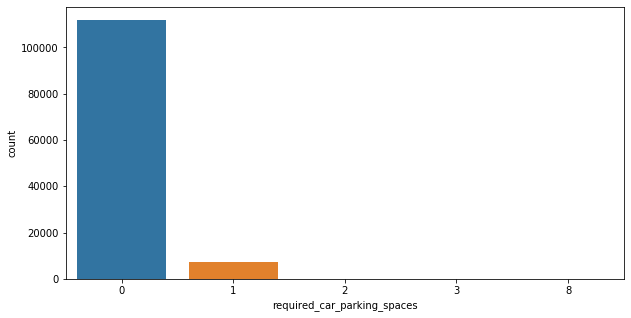

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(df_hotel['required_car_parking_spaces'])
plt.show()

In [125]:
df_hotel[df_hotel['required_car_parking_spaces'] > 3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,...,1,No Deposit,No Agent,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,...,1,No Deposit,No Agent,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23


#### Two values have car parking spaces as 8, but the number of adults in each are 2, we can hence set these as the most frequent value which is 0

In [126]:
df_hotel.loc[df_hotel['required_car_parking_spaces'] > 3, 'required_car_parking_spaces'] = 0

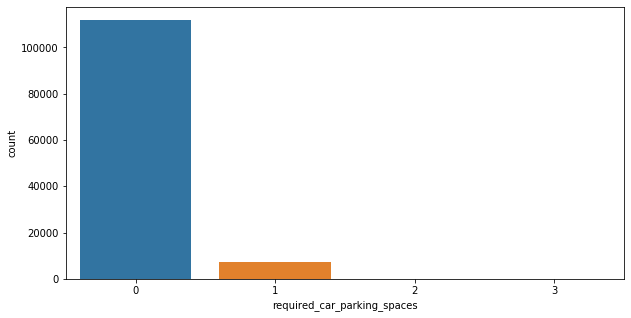

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(df_hotel['required_car_parking_spaces'])
plt.show()

## Variable: Lead time

<Figure size 720x360 with 0 Axes>

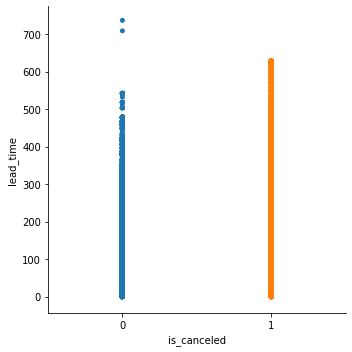

In [128]:
plt.figure(figsize=(10,5))
sns.catplot(x="is_canceled", y="lead_time", data=df_hotel, jitter = False)
plt.show()

We see there are outliers with lead time > 700. We can remove these

In [129]:
df_hotel = df_hotel.drop(df_hotel[df_hotel.lead_time > 700].index)

<Figure size 720x360 with 0 Axes>

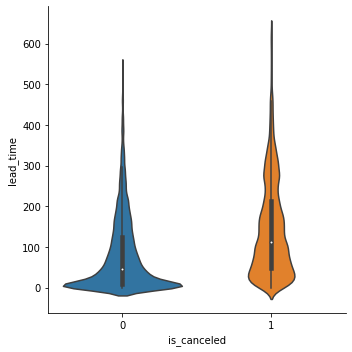

In [130]:
plt.figure(figsize=(10,5))
sns.catplot(x="is_canceled", y="lead_time", data=df_hotel, kind = "violin")
plt.show()

#### We infer that for bookings that weren't canceled, most of the values are closer to 0 lead time, with a long right tail

#### For cancelled bookings, the distibution is slightly flatter, but it is also skewed heavily to the right

## Variable: Country

In [131]:
x = df_hotel['country'].value_counts()
x

PRT    48965
GBR    12127
FRA    10415
ESP     8568
DEU     7287
       ...  
NIC        1
PYF        1
SDN        1
HND        1
CYM        1
Name: country, Length: 177, dtype: int64

#### There are countries with very few bookings. These might skew the results, and hence I want to include all countries with fewer than 10 bookings as 'OTHER'

In [132]:
x = x[~x.isin(list(range(10)))]
x

PRT    48965
GBR    12127
FRA    10415
ESP     8568
DEU     7287
       ...  
BGD       12
SEN       11
BOL       10
MKD       10
CMR       10
Name: country, Length: 96, dtype: int64

In [133]:
y = x.index.tolist()

#### Creating a new column country1 that will assign the value of country to 'OTHER' if it has less than 10 bookings

In [134]:
df_hotel['country1'] = np.where(df_hotel['country'].isin(y), df_hotel['country'], 'OTHER')

In [135]:
df_hotel['country1'].value_counts()

PRT    48965
GBR    12127
FRA    10415
ESP     8568
DEU     7287
       ...  
ALB       12
SEN       11
BOL       10
CMR       10
MKD       10
Name: country1, Length: 97, dtype: int64

## Variable: Market Segment

In [136]:
df_hotel['market_segment'].value_counts().sort_values(ascending = False)

Online TA        56476
Offline TA/TO    24167
Groups           19723
Direct           12595
Corporate         5294
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

There are two undefined values, we can set them as 'Online TA' instead

In [137]:
df_hotel.loc[df_hotel['market_segment'] == 'Undefined', 'market_segment'] = 'Online TA'

## Dropping columns

We can drop the columns that don't give us additional info, or won't be used for modelling

In [138]:
#We use month of the in our model, hence other date variables such as year, week number, day of month can be removed

#Special requests, reservation status and assigned room type will not be known when booking is made, hence won't be
#used for prediction

#We drop country since we have created a new column country1. Reservation status date doesn't provide any info too.

not_needed = ['total_of_special_requests','country']
df_hotel.drop(not_needed, axis=1, inplace=True)

df_hotel.drop(['arrival_date_week_number','assigned_room_type',
               'reservation_status','reservation_status_date'], axis=1, inplace=True)

df_hotel.drop(['arrival_date_day_of_month'], axis=1, inplace=True)
df_hotel.drop(['arrival_date_year'], axis=1, inplace=True)

In [139]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,country1
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,3,No Deposit,No Agent,0,Transient,0.0,0,PRT
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,0,No Deposit,No Agent,0,Transient,75.0,0,GBR
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,0,No Deposit,Others,0,Transient,75.0,0,GBR
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,0,No Deposit,240.0,0,Transient,98.0,0,GBR
5,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,0,No Deposit,240.0,0,Transient,98.0,0,GBR


In [140]:
df_hotel.shape

(119237, 24)

In [141]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces', 'country1'],
      dtype='object')

### This will be our final data for the model, with is_canceled as the target variable. 

### Let's explore correlations to check for multicollinearity

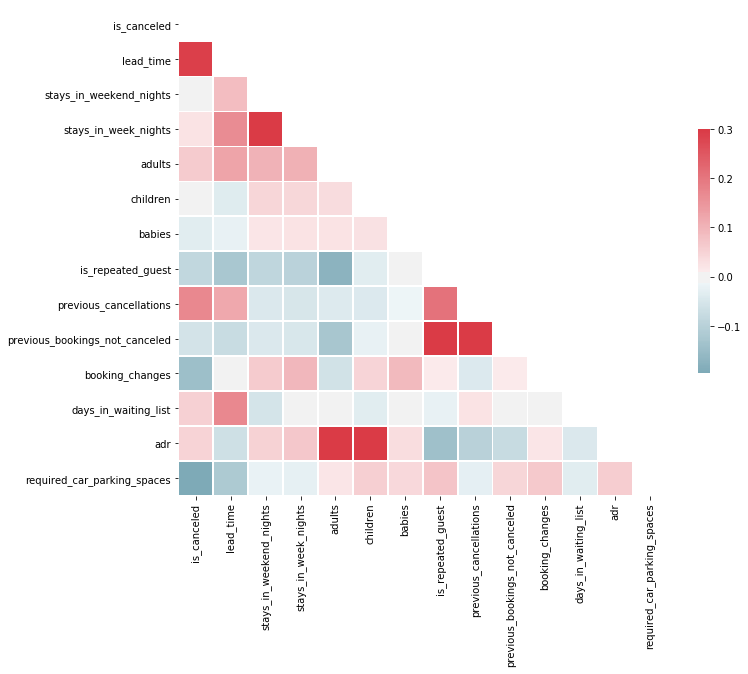

In [142]:
corr = df_hotel.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_hotel.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### There aren't any large correlations above 0.5, hence we don't need to be worried about multicollinearity here

### Exporting this data. The transformations and models will be run in another notebook

In [114]:
df_hotel.to_csv('hotel_data_for_model2.csv')